### Project - Concrete Strength Prediction

Objective To predict the concrete strength using the data available in file concrete_data.xls.

Resources Available The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. 

    
#### Domain 
Marketing

#### Attribute information


Given are the variable name, variable type, the measurement unit and a brief description. The  concrete  compressive  strength  is  the  regression  problem.  The  order  of  this  listing corresponds    to    the    order    of    numerals    along    the    rows    of    the    database

#### Name --Data Type --Measurement --Description
1. Cement (cement) --quantitative --kg in a m3 mixture --Input Variable
2. Blast Furnace Slag (slag) --quantitative --kg ina m3 mixture --Input Variable
3. Fly Ash (ash) --quantitative --kg ina m3 mixture --Input Variable
4. Water(water) --quantitative --kg in a m3 mixture --Input Variable
5. Superplasticizer (superplastic) --quantitative --kg in a m3 mixture --Input Variable
6. Coarse Aggregate (coarseagg) --quantitative --kg in a m3 mixture --Input Variable
7. Fine Aggregate (fineagg) --quantitative --kg in a m3 mixture --Input Variable
8. Age(age) --quantitative --Day (1~365) --Input Variable
9. Concrete compressive strength(strength) --quantitative --MPa --Output Variable


### Exploratory data quality report

#### 1. Univariate analysis

In [127]:
# Imporing the necessary Libraries

import warnings
warnings.filterwarnings('ignore') #Exception Handling

In [128]:
import pandas as pd             #Data Manipulation and Analysis
import numpy as np              #It has functions for working in domain of linear algebra, fourier transform, and matrices.
import matplotlib.pyplot as plt #It is used for creating static, animated, and interactive visualizations.
%matplotlib inline              
import seaborn as sns           #It is used for making statistical graphics.

In [129]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500)

In [130]:
DF = pd.read_csv('concrete.csv')   #Reading the dataset into dataframe 

In [131]:
# Applying info, shape, describe, and find the number of missing values in the data

print(DF.info())
print()
print(DF.shape)
print()
print(DF.describe().T)
print()
print(DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None

(1030, 9)

                count   mean    std    min    25%    50%      75%      max
cement       1,030.00 281.17 104.51 102.00 192.38 272.90   350.00   540.00
slag         1,030.00  73.90  86.28   0.00   0.00  22.00   142.95   359.40
ash          1,030.00  54.19  64.00   0.00   0.00   0.00   118.30   200.10
water        1,030.00 181.57  21.35 121.80 164.90 185

In [132]:
DF.describe().transpose()  # Data Distribution Summary

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [133]:
# Data Distribution Summary


# cement: mean is slightly higher than median...Q3 and Max differnece is very large compared to Q1 and Min difference...
# slag: data is skewed toward right side and might have upper side outliers
# ash: data is skewed toward right side.
# water: median is slightly higher than mean and might have upper side outliers
# superplastic: median is slightly higher than mean and might have upper side outliers
# coarseagg: mean is slightly higher than median
# fineagg: median is slightly higher than mean and might have oultier
# age: mean is higher than median and might have upper side outliers
# strength: mean is slightly higher than median and might have upper side outliers


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000193F4399048>,
      dtype=object)

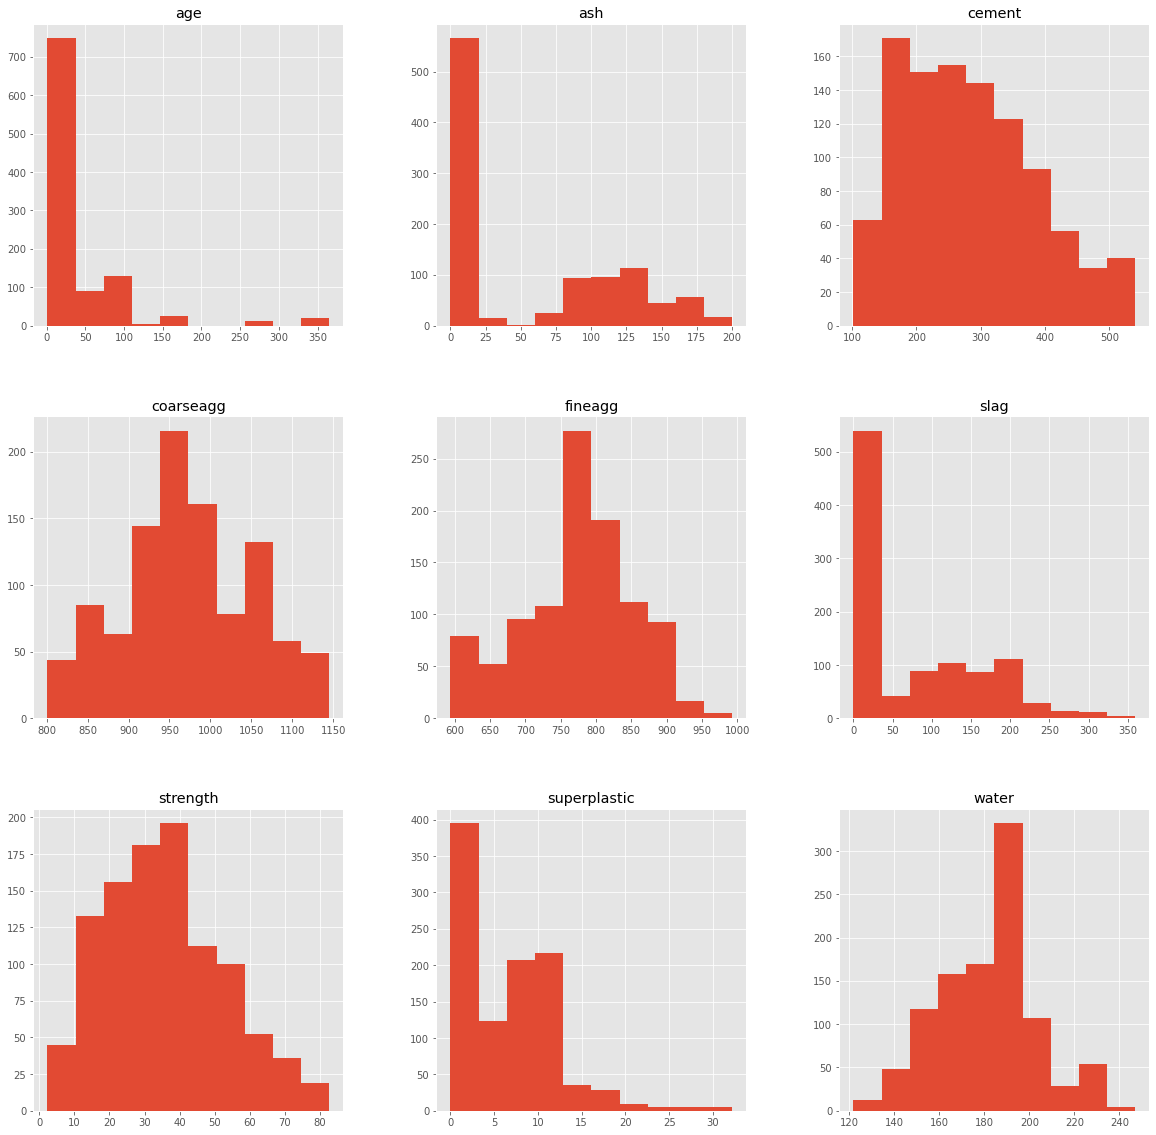

In [134]:
# performing univariant analysis by generating histogram of all dimensions
DF.hist(figsize = [20,20])

cement             AxesSubplot(0.125,0.125;0.0731132x0.755)
slag            AxesSubplot(0.212736,0.125;0.0731132x0.755)
ash             AxesSubplot(0.300472,0.125;0.0731132x0.755)
water           AxesSubplot(0.388208,0.125;0.0731132x0.755)
superplastic    AxesSubplot(0.475943,0.125;0.0731132x0.755)
coarseagg       AxesSubplot(0.563679,0.125;0.0731132x0.755)
fineagg         AxesSubplot(0.651415,0.125;0.0731132x0.755)
age             AxesSubplot(0.739151,0.125;0.0731132x0.755)
strength        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

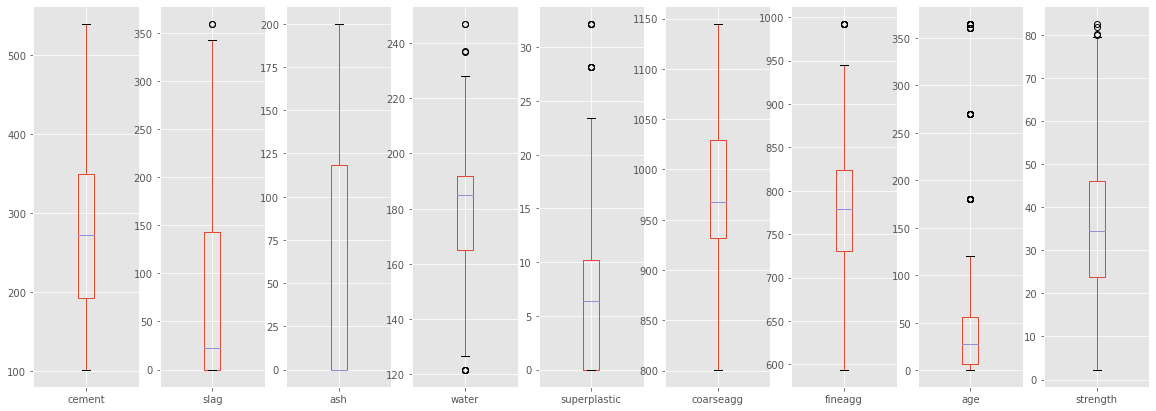

In [135]:
# plotting box plots for independent feature(features with numerical values) to check the outliers
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [136]:
#Outlier Treatment
# handling outlier for slag feature
slag_q3 = DF["slag"].quantile(0.75)
slag_q1 = DF["slag"].quantile(0.25)
slag_iqr = slag_q3-slag_q1 # find out iqr for Mortgage feature
print("slag_iqr:",slag_iqr)
upper_cutoff = slag_q3+ 1.5*slag_iqr
lower_cutoff = slag_q1-1.5*slag_iqr
print("age_upper cutoff:",upper_cutoff)
print("age_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff for slag feature
DF["slag"] = DF["slag"].where(DF["slag"]<upper_cutoff,upper_cutoff)

# handling outlier for water feature
water_q3 = DF["water"].quantile(0.75)
water_q1 = DF["water"].quantile(0.25)
water_iqr = water_q3-water_q1 # find out iqr for water feature
print("water_iqr:",water_iqr)
water_upper_cutoff = water_q3+ 1.5*water_iqr
water_lower_cutoff = water_q1-1.5*water_iqr
print("water_upper cutoff:",upper_cutoff)
print("water_lower cutoff:",lower_cutoff)

#capping outlier at upper cutoff and lower cutoff for water feature
DF["water"] = DF["water"].where(DF["water"]<water_upper_cutoff,water_upper_cutoff)
DF["water"] = DF["water"].where(DF["water"]>water_lower_cutoff,water_lower_cutoff)

# handling outlier for superplastic feature
superplastic_q3 = DF["superplastic"].quantile(0.75)
superplastic_q1 = DF["superplastic"].quantile(0.25)
superplastic_iqr = superplastic_q3-superplastic_q1 # find out iqr for superplastic feature
print("superplastic_iqr:",superplastic_iqr)
superplastic_upper_cutoff = superplastic_q3+ 1.5*superplastic_iqr
superplastic_lower_cutoff = superplastic_q1-1.5*superplastic_iqr
print("superplastic_upper cutoff:",superplastic_upper_cutoff)
print("superplastic_lower cutoff:",superplastic_lower_cutoff)

#capping outlier at upper cutoff for superplastic feature
DF["superplastic"] = DF["superplastic"].where(DF["superplastic"]<superplastic_upper_cutoff,superplastic_upper_cutoff)



# handling outlier for fineagg feature
fineagg_q3 = DF["fineagg"].quantile(0.75)
fineagg_q1 = DF["fineagg"].quantile(0.25)
fineagg_iqr = fineagg_q3-fineagg_q1 # find out iqr for CCAvg feature
print("fineagg_iqr:",fineagg_iqr)
fineagg_upper_cutoff = fineagg_q3+ 1.5*fineagg_iqr
fineagg_lower_cutoff = fineagg_q1-1.5*fineagg_iqr
print("fineagg_upper cutoff:",fineagg_upper_cutoff)
print("fineagg_lower cutoff:",fineagg_lower_cutoff)

#capping outlier at upper cutoff for fineagg feature
DF["fineagg"] = DF["fineagg"].where(DF["fineagg"]<fineagg_upper_cutoff,fineagg_upper_cutoff)



# handling outlier for age feature
age_q3 = DF["age"].quantile(0.75)
age_q1 = DF["age"].quantile(0.25)
age_iqr = age_q3-age_q1 # find out iqr for age feature
print("age_iqr:",age_iqr)
age_upper_cutoff = age_q3+ 1.5*age_iqr
age_lower_cutoff = age_q1-1.5*age_iqr
print("age_upper cutoff:",age_upper_cutoff)
print("age_lower cutoff:",age_lower_cutoff)

#capping outlier at upper cutoff for age feature
DF["age"] = DF["age"].where(DF["age"]<age_upper_cutoff,age_upper_cutoff)


# handling outlier for strength feature
strength_q3 = DF["strength"].quantile(0.75)
strength_q1 = DF["strength"].quantile(0.25)
strength_iqr = strength_q3-strength_q1 # find out iqr for strength feature
print("strength:",strength_iqr)
strength_upper_cutoff = strength_q3+ 1.5*strength_iqr
strength_lower_cutoff = strength_q1-1.5*strength_iqr
print("strength_upper cutoff:",strength_upper_cutoff)
print("strength_lower cutoff:",strength_lower_cutoff)

#capping outlier at upper cutoff for strength feature
DF["strength"] = DF["strength"].where(DF["strength"]<strength_upper_cutoff,strength_upper_cutoff)

slag_iqr: 142.95
age_upper cutoff: 357.375
age_lower cutoff: -214.42499999999998
water_iqr: 27.099999999999994
water_upper cutoff: 357.375
water_lower cutoff: -214.42499999999998
superplastic_iqr: 10.2
superplastic_upper cutoff: 25.5
superplastic_lower cutoff: -15.299999999999999
fineagg_iqr: 93.05000000000007
fineagg_upper cutoff: 963.575
fineagg_lower cutoff: 591.3749999999998
age_iqr: 49.0
age_upper cutoff: 129.5
age_lower cutoff: -66.5
strength: 22.425000000000008
strength_upper cutoff: 79.77250000000001
strength_lower cutoff: -9.927500000000013


cement             AxesSubplot(0.125,0.125;0.0731132x0.755)
slag            AxesSubplot(0.212736,0.125;0.0731132x0.755)
ash             AxesSubplot(0.300472,0.125;0.0731132x0.755)
water           AxesSubplot(0.388208,0.125;0.0731132x0.755)
superplastic    AxesSubplot(0.475943,0.125;0.0731132x0.755)
coarseagg       AxesSubplot(0.563679,0.125;0.0731132x0.755)
fineagg         AxesSubplot(0.651415,0.125;0.0731132x0.755)
age             AxesSubplot(0.739151,0.125;0.0731132x0.755)
strength        AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

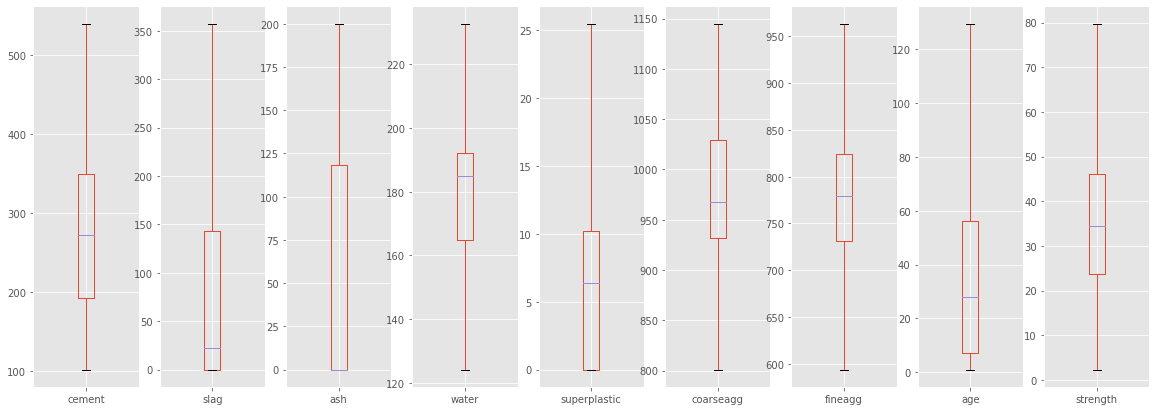

In [137]:
# Checking Outliers again after Treatment
fig, ax = plt.subplots(figsize=(20,7))
DF.plot(kind="box",subplots = True, ax=ax)

In [138]:
# Cheking for duplicate data in a given DataFrame
DF.duplicated().sum()

25

In [139]:
# There are total 25 duplicate rows present in this DataFrame.

#### 2. Bi Variate or Multivariate analysis

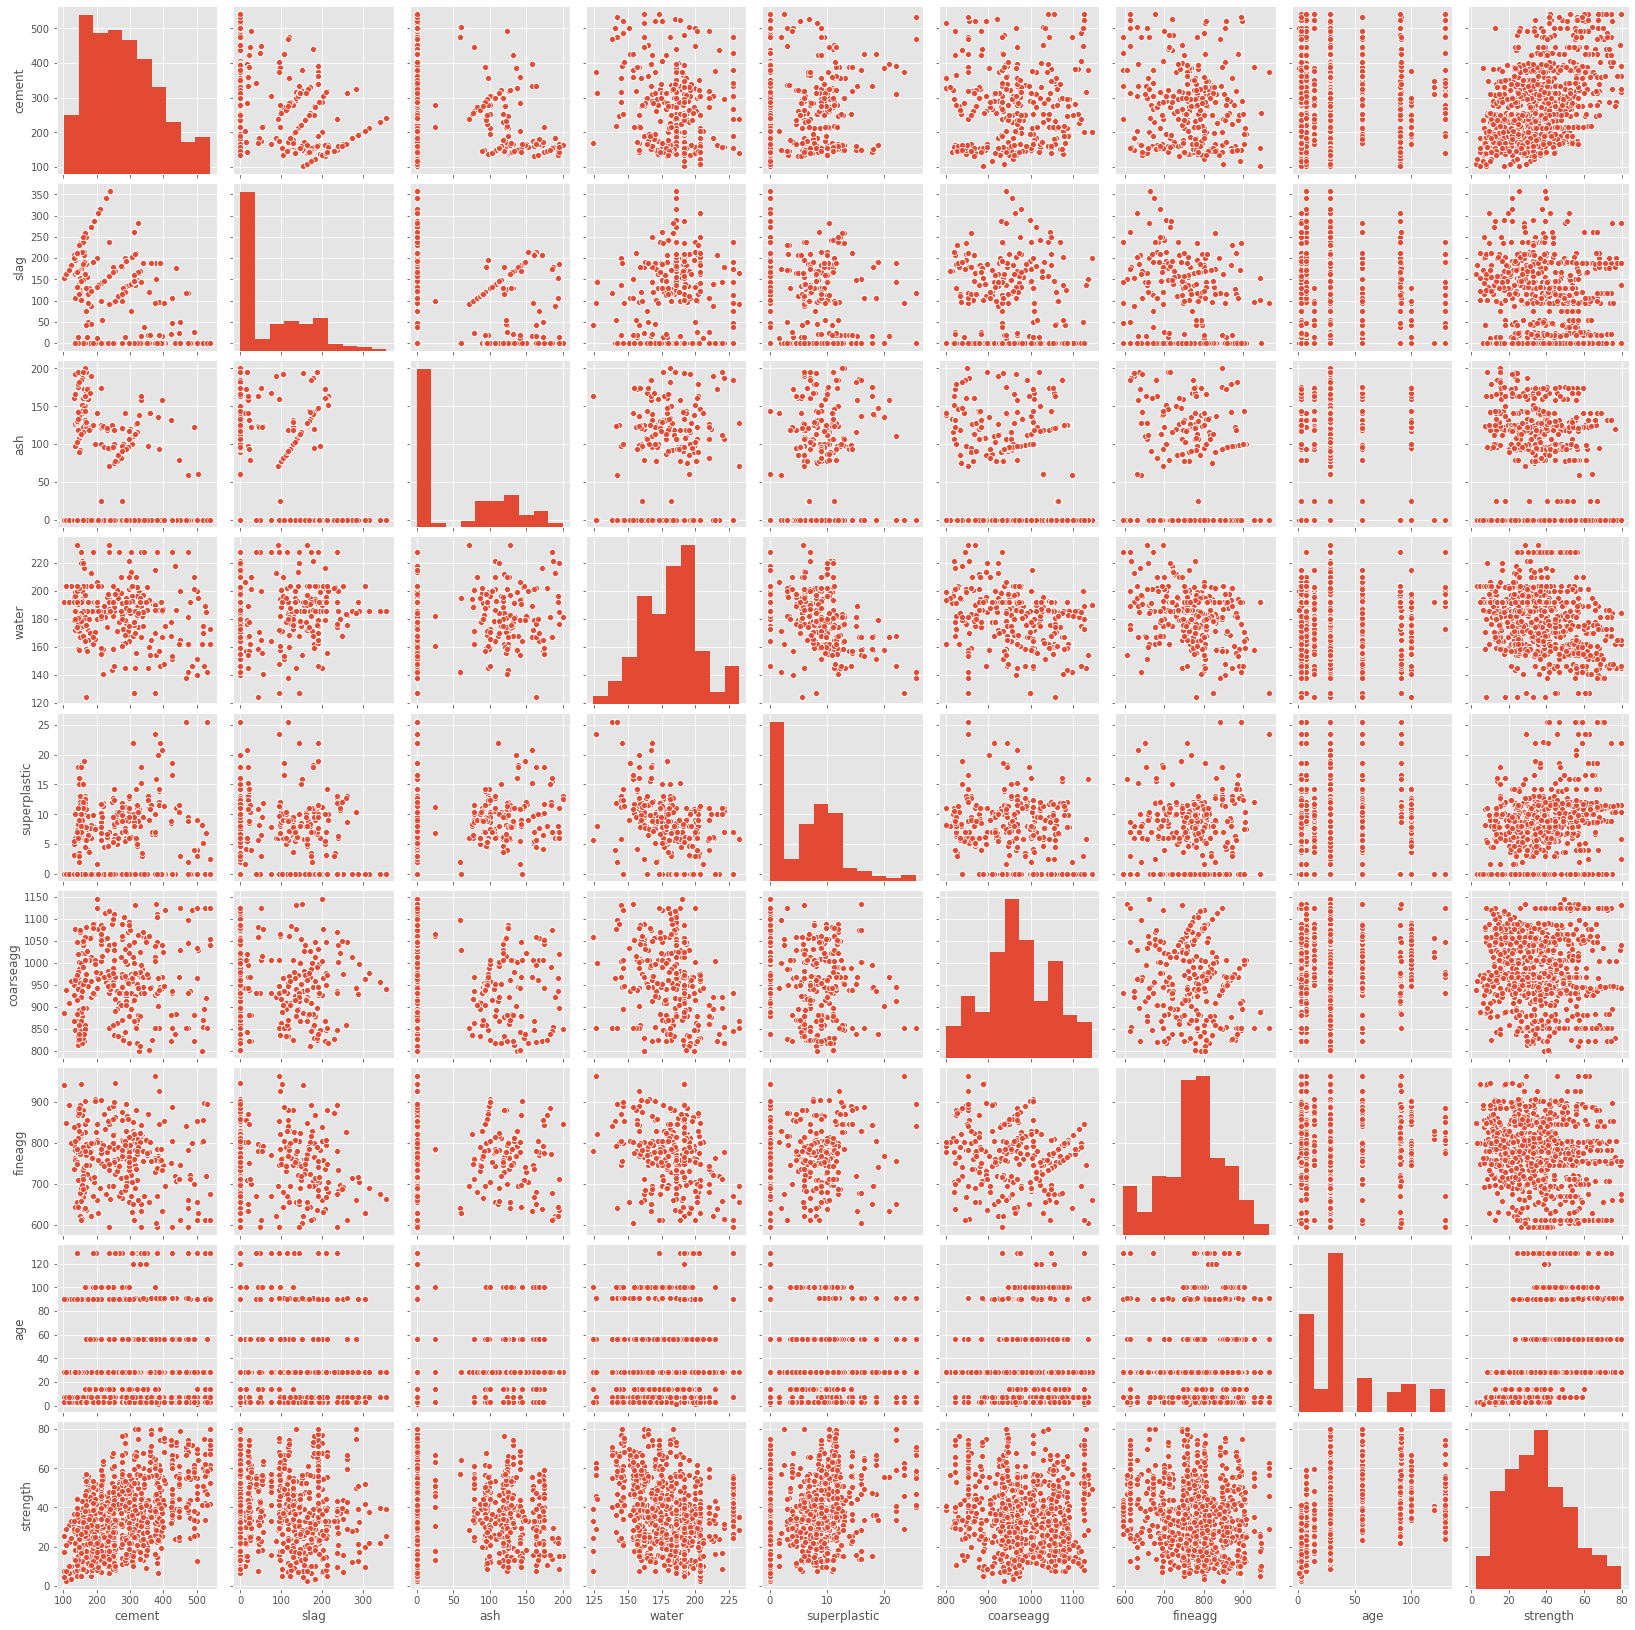

In [140]:
%matplotlib inline
sns.pairplot(DF)

In [141]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

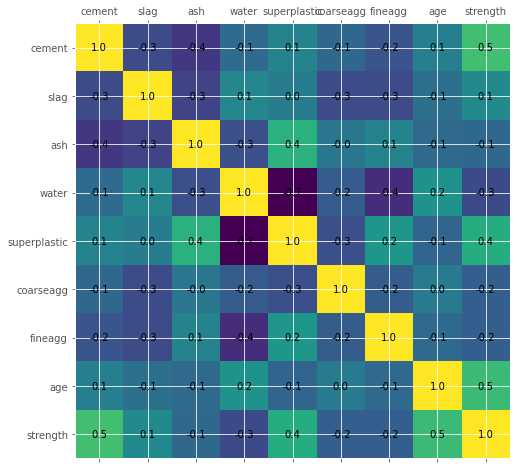

In [142]:
plot_corr(DF)

In [143]:
# ash,fineagg,coarseagg are negatively co-related.
# After Detailed Analysis we can can drop ash,fineagg and coarseagg
# As the above mentioned columns are not required to predict strength of the concrete

DF.drop(['ash','fineagg','coarseagg','water'], axis=1, inplace = True)

#### 3. Feature Engineering techniques

In [144]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

Creating the training set and test set in ratioof 70:30

In [145]:
## Define X and Y variables
X = DF.drop('strength', axis=1)
Y = DF[['strength']]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

lets check split of the data


In [147]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(DF.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(DF.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [148]:
## Fit Linear Model

#### Creatingthe model and tuning it

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.08273606923890452
The coefficient for slag is 0.05440849244004811
The coefficient for superplastic is 1.0955529398013122
The coefficient for age is 0.2284822581206357


In [152]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.93344283712625


The score (R^2) for in-sample and out of sample

In [153]:
regression_model.score(X_train, y_train)

0.6674150286656477

In [154]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.6778662217982223

#### Adding interaction terms 

In [155]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7100426325318896


In [156]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.7007027337368891


In [157]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(721, 4)
(721, 11)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 

In [158]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [159]:
y_pred = regressor.predict(X_test) 

In [160]:
regressor_score = regressor.score(X_train, y_train)

In [161]:
regressor_score

0.9924809560072178

In [162]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': regressor_score})

resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Linear Regression,0.99


In [163]:
from sklearn.metrics import mean_squared_error, r2_score
# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',regressor_score)

coefficient of determination R^2 of the prediction.:  0.9924809560072178


In [164]:
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 56.00
Test Variance score: 0.81


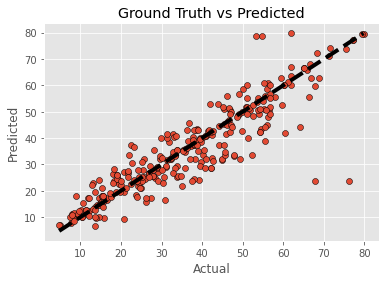

In [165]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [166]:
n=DF['strength'].count()
train_set = DF.head(int(round(n*0.7))) # Up to the last initial training set row
test_set = DF.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("strength") into separate vectors for training set and test set
train_labels = train_set.pop("strength")
test_labels = test_set.pop("strength")

Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [167]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor( )
dt_model.fit(train_set, train_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [168]:
dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

In [169]:
DT_score = regressor.score(X_test, y_test)

In [170]:
DT_score

0.8070307778243346

In [171]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Decision Tree Regressor'], 'accuracy': DT_score})

resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81


In [172]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))#Print the feature importance of the decision model

              Imp
cement       0.40
slag         0.10
superplastic 0.14
age          0.36


In [173]:
tempResultsDf = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': [regressor_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81
0,Linear Regression,0.99


Apply the Random forest model and print the accuracy of Random forest Model

In [174]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
RF_score = rfcl.score(test_set , test_labels)

In [175]:
RF_score

0.7897317562336486

In [176]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [RF_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81
0,Linear Regression,0.99
0,Random Forest,0.79


Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [177]:
from sklearn.ensemble import AdaBoostRegressor
#abcl = AdaBoostRegressor(base_estimator=dt_model, n_estimators=50)
abcl = AdaBoostRegressor( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
ADB_score = abcl.score(test_set , test_labels)

In [178]:
ADB_score

0.6956692109550581

In [179]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoost'], 'accuracy': [ADB_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81
0,Linear Regression,0.99
0,Random Forest,0.79
0,AdaBoost,0.70


Apply Bagging Regressor Algorithm and print the accuracy.

In [180]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(train_set, train_labels)

In [181]:
test_pred = bgcl.predict(test_set)
BRA_score = bgcl.score(test_set , test_labels)

In [182]:
BRA_score

0.838415331471554

In [183]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [BRA_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81
0,Linear Regression,0.99
0,Random Forest,0.79
0,AdaBoost,0.70
0,Bagging Regressor,0.84


Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [184]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)

In [185]:
test_pred = gbcl.predict(test_set)
GBR_score = gbcl.score(test_set , test_labels)

In [186]:
GBR_score

0.7709336167225562

In [187]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [GBR_score]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree Regressor,0.81
0,Linear Regression,0.99
0,Random Forest,0.79
0,AdaBoost,0.70
0,Bagging Regressor,0.84
0,Gradient Boost Regressor,0.77


###  Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**

Cross Validation Score

In [188]:
X = DF.drop(columns= ['strength'])  # Seperating the target and the rest
y = DF.strength

In [189]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score_DT_CV = cross_val_score(dt_model, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score_DT_CV}')

Cross validation score of Decision tree = 0.8418902005223105


In [190]:
#Random Forest rf
score_RF_CV = cross_val_score(rfcl, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score_RF_CV}')

Cross validation score of Random forest = 0.8128362993186716


Parameter Tuning Using GridDSearch

Doing for RandomForest

In [191]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestRegressor(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100} 


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   21.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   27.8s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [192]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)


score_Tuned_RF_CV = cross_val_score(rf, X, y, cv = 5).mean()


score_Tuned_RF_CV

0.8895991395573712

In [193]:
score1 = regressor_score
score2 = DT_score
score3 = RF_score
score4 = ADB_score
score5 = BRA_score
score6 = GBR_score
score7 = score_DT_CV
score8 = score_RF_CV
score9 = score_Tuned_RF_CV

In [195]:
data = {'Technique' : ['Linear Regression', 'Decision tree',
                       'Random forest', 'Ada Boost','Bagging','Gradient Boost','DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7,score8,score9] }

result = pd.DataFrame(data)

In [196]:
result

,Technique,Score
0,Linear Regression,0.99
1,Decision tree,0.81
2,Random forest,0.79
3,Ada Boost,0.70
4,Bagging,0.84
5,Gradient Boost,0.77
6,DT CV,0.84
7,RF CV,0.81
8,Tuned RF CV,0.89


# Conclusion:

 - After Hyperparameter tuning we can see all the results of differnt models from the the above dataframe.
 - By seeing the DataFrame we can say that Linear Regression performs better in order to predict the strength of Comprehensive   Concrete.
 - By seeing the DataFrame we can say that Linear Regression peroms better compare to Ensemble Techniques.
